In [115]:
import numpy as np
import pandas as pd
import warnings
from sklearn import preprocessing
import matplotlib.pyplot as plt
import seaborn as sns

In [116]:
warnings.filterwarnings('ignore')

In [64]:
df_news = pd.read_csv(r'../data/OnlineNewsPopularity.csv')

In [65]:
df_news_copy = df_news.copy()
df_news_copy.head()

,url,timedelta,n_tokens_title,n_tokens_content,n_unique_tokens,n_non_stop_words,n_non_stop_unique_tokens,num_hrefs,num_self_hrefs,num_imgs,...,min_positive_polarity,max_positive_polarity,avg_negative_polarity,min_negative_polarity,max_negative_polarity,title_subjectivity,title_sentiment_polarity,abs_title_subjectivity,abs_title_sentiment_polarity,shares
0,http://mashable.com/2013/01/07/amazon-instant-...,731.0,12.0,219.0,0.663594,1.0,0.815385,4.0,2.0,1.0,...,0.100000,0.7,-0.350000,-0.600,-0.200000,0.500000,-0.187500,0.000000,0.187500,593
1,http://mashable.com/2013/01/07/ap-samsung-spon...,731.0,9.0,255.0,0.604743,1.0,0.791946,3.0,1.0,1.0,...,0.033333,0.7,-0.118750,-0.125,-0.100000,0.000000,0.000000,0.500000,0.000000,711
2,http://mashable.com/2013/01/07/apple-40-billio...,731.0,9.0,211.0,0.575130,1.0,0.663866,3.0,1.0,1.0,...,0.100000,1.0,-0.466667,-0.800,-0.133333,0.000000,0.000000,0.500000,0.000000,1500
3,http://mashable.com/2013/01/07/astronaut-notre...,731.0,9.0,531.0,0.503788,1.0,0.665635,9.0,0.0,1.0,...,0.136364,0.8,-0.369697,-0.600,-0.166667,0.000000,0.000000,0.500000,0.000000,1200
4,http://mashable.com/2013/01/07/att-u-verse-apps/,731.0,13.0,1072.0,0.415646,1.0,0.540890,19.0,19.0,20.0,...,0.033333,1.0,-0.220192,-0.500,-0.050000,0.454545,0.136364,0.045455,0.136364,505


In [66]:
df_news.head()

,url,timedelta,n_tokens_title,n_tokens_content,n_unique_tokens,n_non_stop_words,n_non_stop_unique_tokens,num_hrefs,num_self_hrefs,num_imgs,...,min_positive_polarity,max_positive_polarity,avg_negative_polarity,min_negative_polarity,max_negative_polarity,title_subjectivity,title_sentiment_polarity,abs_title_subjectivity,abs_title_sentiment_polarity,shares
0,http://mashable.com/2013/01/07/amazon-instant-...,731.0,12.0,219.0,0.663594,1.0,0.815385,4.0,2.0,1.0,...,0.100000,0.7,-0.350000,-0.600,-0.200000,0.500000,-0.187500,0.000000,0.187500,593
1,http://mashable.com/2013/01/07/ap-samsung-spon...,731.0,9.0,255.0,0.604743,1.0,0.791946,3.0,1.0,1.0,...,0.033333,0.7,-0.118750,-0.125,-0.100000,0.000000,0.000000,0.500000,0.000000,711
2,http://mashable.com/2013/01/07/apple-40-billio...,731.0,9.0,211.0,0.575130,1.0,0.663866,3.0,1.0,1.0,...,0.100000,1.0,-0.466667,-0.800,-0.133333,0.000000,0.000000,0.500000,0.000000,1500
3,http://mashable.com/2013/01/07/astronaut-notre...,731.0,9.0,531.0,0.503788,1.0,0.665635,9.0,0.0,1.0,...,0.136364,0.8,-0.369697,-0.600,-0.166667,0.000000,0.000000,0.500000,0.000000,1200
4,http://mashable.com/2013/01/07/att-u-verse-apps/,731.0,13.0,1072.0,0.415646,1.0,0.540890,19.0,19.0,20.0,...,0.033333,1.0,-0.220192,-0.500,-0.050000,0.454545,0.136364,0.045455,0.136364,505


In [67]:
df_news.columns

Index(['url', 'timedelta', 'n_tokens_title', 'n_tokens_content',
       'n_unique_tokens', 'n_non_stop_words', 'n_non_stop_unique_tokens',
       'num_hrefs', 'num_self_hrefs', 'num_imgs', 'num_videos',
       'average_token_length', 'num_keywords', 'data_channel_is_lifestyle',
       ' data_channel_is_entertainment', 'data_channel_is_bus',
       'data_channel_is_socmed', 'data_channel_is_tech',
       'data_channel_is_world', 'kw_min_min', 'kw_max_min', 'kw_avg_min',
       'kw_min_max', 'kw_max_max', 'kw_avg_max', 'kw_min_avg', 'kw_max_avg',
       'kw_avg_avg', 'self_reference_min_shares', 'self_reference_max_shares',
       'self_reference_avg_sharess', 'weekday_is_monday', 'weekday_is_tuesday',
       'weekday_is_wednesday', 'weekday_is_thursday', 'weekday_is_friday',
       'weekday_is_saturday', 'weekday_is_sunday', 'is_weekend', 'LDA_00',
       'LDA_01', 'LDA_02', 'LDA_03', 'LDA_04', 'global_subjectivity',
       'global_sentiment_polarity', 'global_rate_positive_words',
    

In [68]:
df_news = df_news.drop(['url', 'timedelta'], axis=1)

In [70]:
df_news.head()

,n_tokens_title,n_tokens_content,n_unique_tokens,n_non_stop_words,n_non_stop_unique_tokens,num_hrefs,num_self_hrefs,num_imgs,num_videos,average_token_length,...,min_positive_polarity,max_positive_polarity,avg_negative_polarity,min_negative_polarity,max_negative_polarity,title_subjectivity,title_sentiment_polarity,abs_title_subjectivity,abs_title_sentiment_polarity,shares
0,12.0,219.0,0.663594,1.0,0.815385,4.0,2.0,1.0,0.0,4.680365,...,0.100000,0.7,-0.350000,-0.600,-0.200000,0.500000,-0.187500,0.000000,0.187500,593
1,9.0,255.0,0.604743,1.0,0.791946,3.0,1.0,1.0,0.0,4.913725,...,0.033333,0.7,-0.118750,-0.125,-0.100000,0.000000,0.000000,0.500000,0.000000,711
2,9.0,211.0,0.575130,1.0,0.663866,3.0,1.0,1.0,0.0,4.393365,...,0.100000,1.0,-0.466667,-0.800,-0.133333,0.000000,0.000000,0.500000,0.000000,1500
3,9.0,531.0,0.503788,1.0,0.665635,9.0,0.0,1.0,0.0,4.404896,...,0.136364,0.8,-0.369697,-0.600,-0.166667,0.000000,0.000000,0.500000,0.000000,1200
4,13.0,1072.0,0.415646,1.0,0.540890,19.0,19.0,20.0,0.0,4.682836,...,0.033333,1.0,-0.220192,-0.500,-0.050000,0.454545,0.136364,0.045455,0.136364,505


In [71]:
df_news.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39644 entries, 0 to 39643
Data columns (total 59 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   n_tokens_title                  39644 non-null  float64
 1   n_tokens_content                39644 non-null  float64
 2   n_unique_tokens                 39644 non-null  float64
 3   n_non_stop_words                39644 non-null  float64
 4   n_non_stop_unique_tokens        39644 non-null  float64
 5   num_hrefs                       39644 non-null  float64
 6   num_self_hrefs                  39644 non-null  float64
 7   num_imgs                        39644 non-null  float64
 8   num_videos                      39644 non-null  float64
 9   average_token_length            39644 non-null  float64
 10  num_keywords                    39644 non-null  float64
 11  data_channel_is_lifestyle       39644 non-null  float64
 12   data_channel_is_entertainment  

In [72]:
df_news.describe()

,n_tokens_title,n_tokens_content,n_unique_tokens,n_non_stop_words,n_non_stop_unique_tokens,num_hrefs,num_self_hrefs,num_imgs,num_videos,average_token_length,...,min_positive_polarity,max_positive_polarity,avg_negative_polarity,min_negative_polarity,max_negative_polarity,title_subjectivity,title_sentiment_polarity,abs_title_subjectivity,abs_title_sentiment_polarity,shares
count,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,...,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000
mean,10.398749,546.514731,0.548216,0.996469,0.689175,10.883690,3.293638,4.544143,1.249874,4.548239,...,0.095446,0.756728,-0.259524,-0.521944,-0.107500,0.282353,0.071425,0.341843,0.156064,3395.380184
std,2.114037,471.107508,3.520708,5.231231,3.264816,11.332017,3.855141,8.309434,4.107855,0.844406,...,0.071315,0.247786,0.127726,0.290290,0.095373,0.324247,0.265450,0.188791,0.226294,11626.950749
min,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,-1.000000,-1.000000,-1.000000,0.000000,-1.000000,0.000000,0.000000,1.000000
25%,9.000000,246.000000,0.470870,1.000000,0.625739,4.000000,1.000000,1.000000,0.000000,4.478404,...,0.050000,0.600000,-0.328383,-0.700000,-0.125000,0.000000,0.000000,0.166667,0.000000,946.000000
50%,10.000000,409.000000,0.539226,1.000000,0.690476,8.000000,3.000000,1.000000,0.000000,4.664082,...,0.100000,0.800000,-0.253333,-0.500000,-0.100000,0.150000,0.000000,0.500000,0.000000,1400.000000
75%,12.000000,716.000000,0.608696,1.000000,0.754630,14.000000,4.000000,4.000000,1.000000,4.854839,...,0.100000,1.000000,-0.186905,-0.300000,-0.050000,0.500000,0.150000,0.500000,0.250000,2800.000000
max,23.000000,8474.000000,701.000000,1042.000000,650.000000,304.000000,116.000000,128.000000,91.000000,8.041534,...,1.000000,1.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.500000,1.000000,843300.000000


In [73]:
df_news['shares'].describe()

count     39644.000000
mean       3395.380184
std       11626.950749
min           1.000000
25%         946.000000
50%        1400.000000
75%        2800.000000
max      843300.000000
Name: shares, dtype: float64

In [78]:
share_lst = df_news['shares']
share_lst

0         593
1         711
2        1500
3        1200
4         505
         ... 
39639    1800
39640    1900
39641    1900
39642    1100
39643    1300
Name: shares, Length: 39644, dtype: int64

In [88]:
share_cate = list()
for share in share_lst:
    if share < 700:
        share_cate.append('VERY POOR')
    elif share < 1000:
        share_cate.append('POOR')
    elif share < 1500:
        share_cate.append('AVERAGE')
    elif share < 33000:
        share_cate.append('GOOD')
    elif share < 55000:
        share_cate.append('VERY GOOD')
    elif share < 77000:
        share_cate.append('EXCELLENT')
    else:
        share_cate.append('EXCEPTIONAL')
share_cate

['VERY POOR',
 'POOR',
 'GOOD',
 'AVERAGE',
 'VERY POOR',
 'POOR',
 'VERY POOR',
 'POOR',
 'GOOD',
 'POOR',
 'GOOD',
 'GOOD',
 'POOR',
 'GOOD',
 'POOR',
 'GOOD',
 'GOOD',
 'GOOD',
 'GOOD',
 'GOOD',
 'GOOD',
 'VERY POOR',
 'VERY POOR',
 'GOOD',
 'POOR',
 'POOR',
 'GOOD',
 'GOOD',
 'VERY POOR',
 'VERY POOR',
 'GOOD',
 'GOOD',
 'VERY POOR',
 'VERY POOR',
 'GOOD',
 'VERY POOR',
 'GOOD',
 'GOOD',
 'VERY POOR',
 'GOOD',
 'AVERAGE',
 'VERY POOR',
 'GOOD',
 'AVERAGE',
 'GOOD',
 'VERY POOR',
 'VERY POOR',
 'AVERAGE',
 'VERY POOR',
 'AVERAGE',
 'GOOD',
 'VERY POOR',
 'VERY POOR',
 'GOOD',
 'GOOD',
 'GOOD',
 'AVERAGE',
 'AVERAGE',
 'POOR',
 'VERY POOR',
 'VERY POOR',
 'POOR',
 'VERY POOR',
 'VERY POOR',
 'VERY POOR',
 'GOOD',
 'VERY POOR',
 'GOOD',
 'AVERAGE',
 'POOR',
 'AVERAGE',
 'GOOD',
 'VERY POOR',
 'VERY POOR',
 'AVERAGE',
 'VERY POOR',
 'VERY POOR',
 'GOOD',
 'POOR',
 'POOR',
 'VERY POOR',
 'GOOD',
 'AVERAGE',
 'AVERAGE',
 'AVERAGE',
 'GOOD',
 'GOOD',
 'AVERAGE',
 'GOOD',
 'AVERAGE',
 'VER

In [97]:
df_news['popularity'] = share_cate

In [98]:
df_news.head()

,n_tokens_title,n_tokens_content,n_unique_tokens,n_non_stop_words,n_non_stop_unique_tokens,num_hrefs,num_self_hrefs,num_imgs,num_videos,average_token_length,...,max_positive_polarity,avg_negative_polarity,min_negative_polarity,max_negative_polarity,title_subjectivity,title_sentiment_polarity,abs_title_subjectivity,abs_title_sentiment_polarity,shares,popularity
0,12.0,219.0,0.663594,1.0,0.815385,4.0,2.0,1.0,0.0,4.680365,...,0.7,-0.350000,-0.600,-0.200000,0.500000,-0.187500,0.000000,0.187500,593,VERY POOR
1,9.0,255.0,0.604743,1.0,0.791946,3.0,1.0,1.0,0.0,4.913725,...,0.7,-0.118750,-0.125,-0.100000,0.000000,0.000000,0.500000,0.000000,711,POOR
2,9.0,211.0,0.575130,1.0,0.663866,3.0,1.0,1.0,0.0,4.393365,...,1.0,-0.466667,-0.800,-0.133333,0.000000,0.000000,0.500000,0.000000,1500,GOOD
3,9.0,531.0,0.503788,1.0,0.665635,9.0,0.0,1.0,0.0,4.404896,...,0.8,-0.369697,-0.600,-0.166667,0.000000,0.000000,0.500000,0.000000,1200,AVERAGE
4,13.0,1072.0,0.415646,1.0,0.540890,19.0,19.0,20.0,0.0,4.682836,...,1.0,-0.220192,-0.500,-0.050000,0.454545,0.136364,0.045455,0.136364,505,VERY POOR


Text(0.5, 1.0, 'COUNT OF POPULARITY')

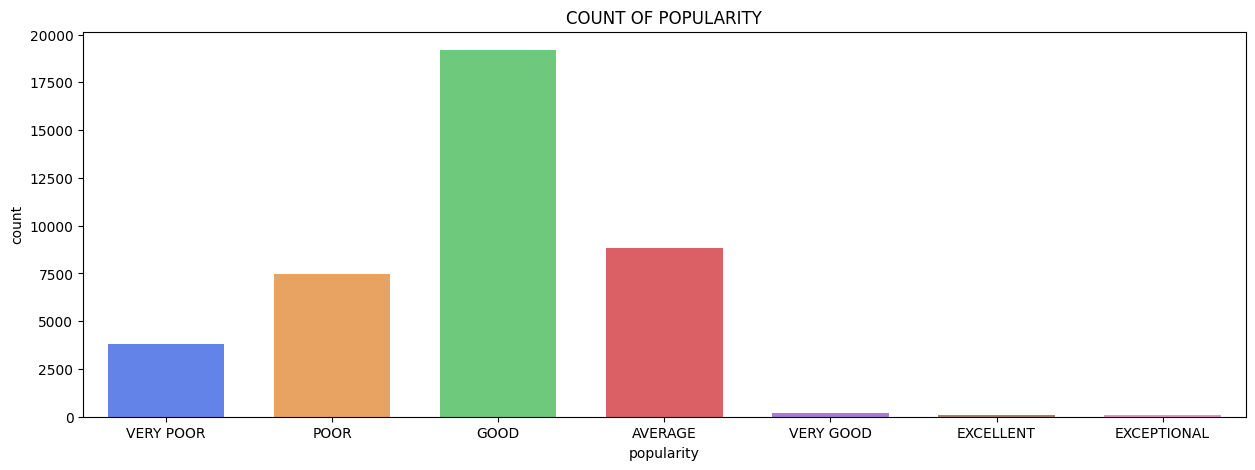

In [118]:
plt.figure(figsize=(15, 5))
sns.countplot(x='popularity', data=df_news, alpha = 0.7, palette='bright', width=0.7)
plt.title('COUNT OF POPULARITY')


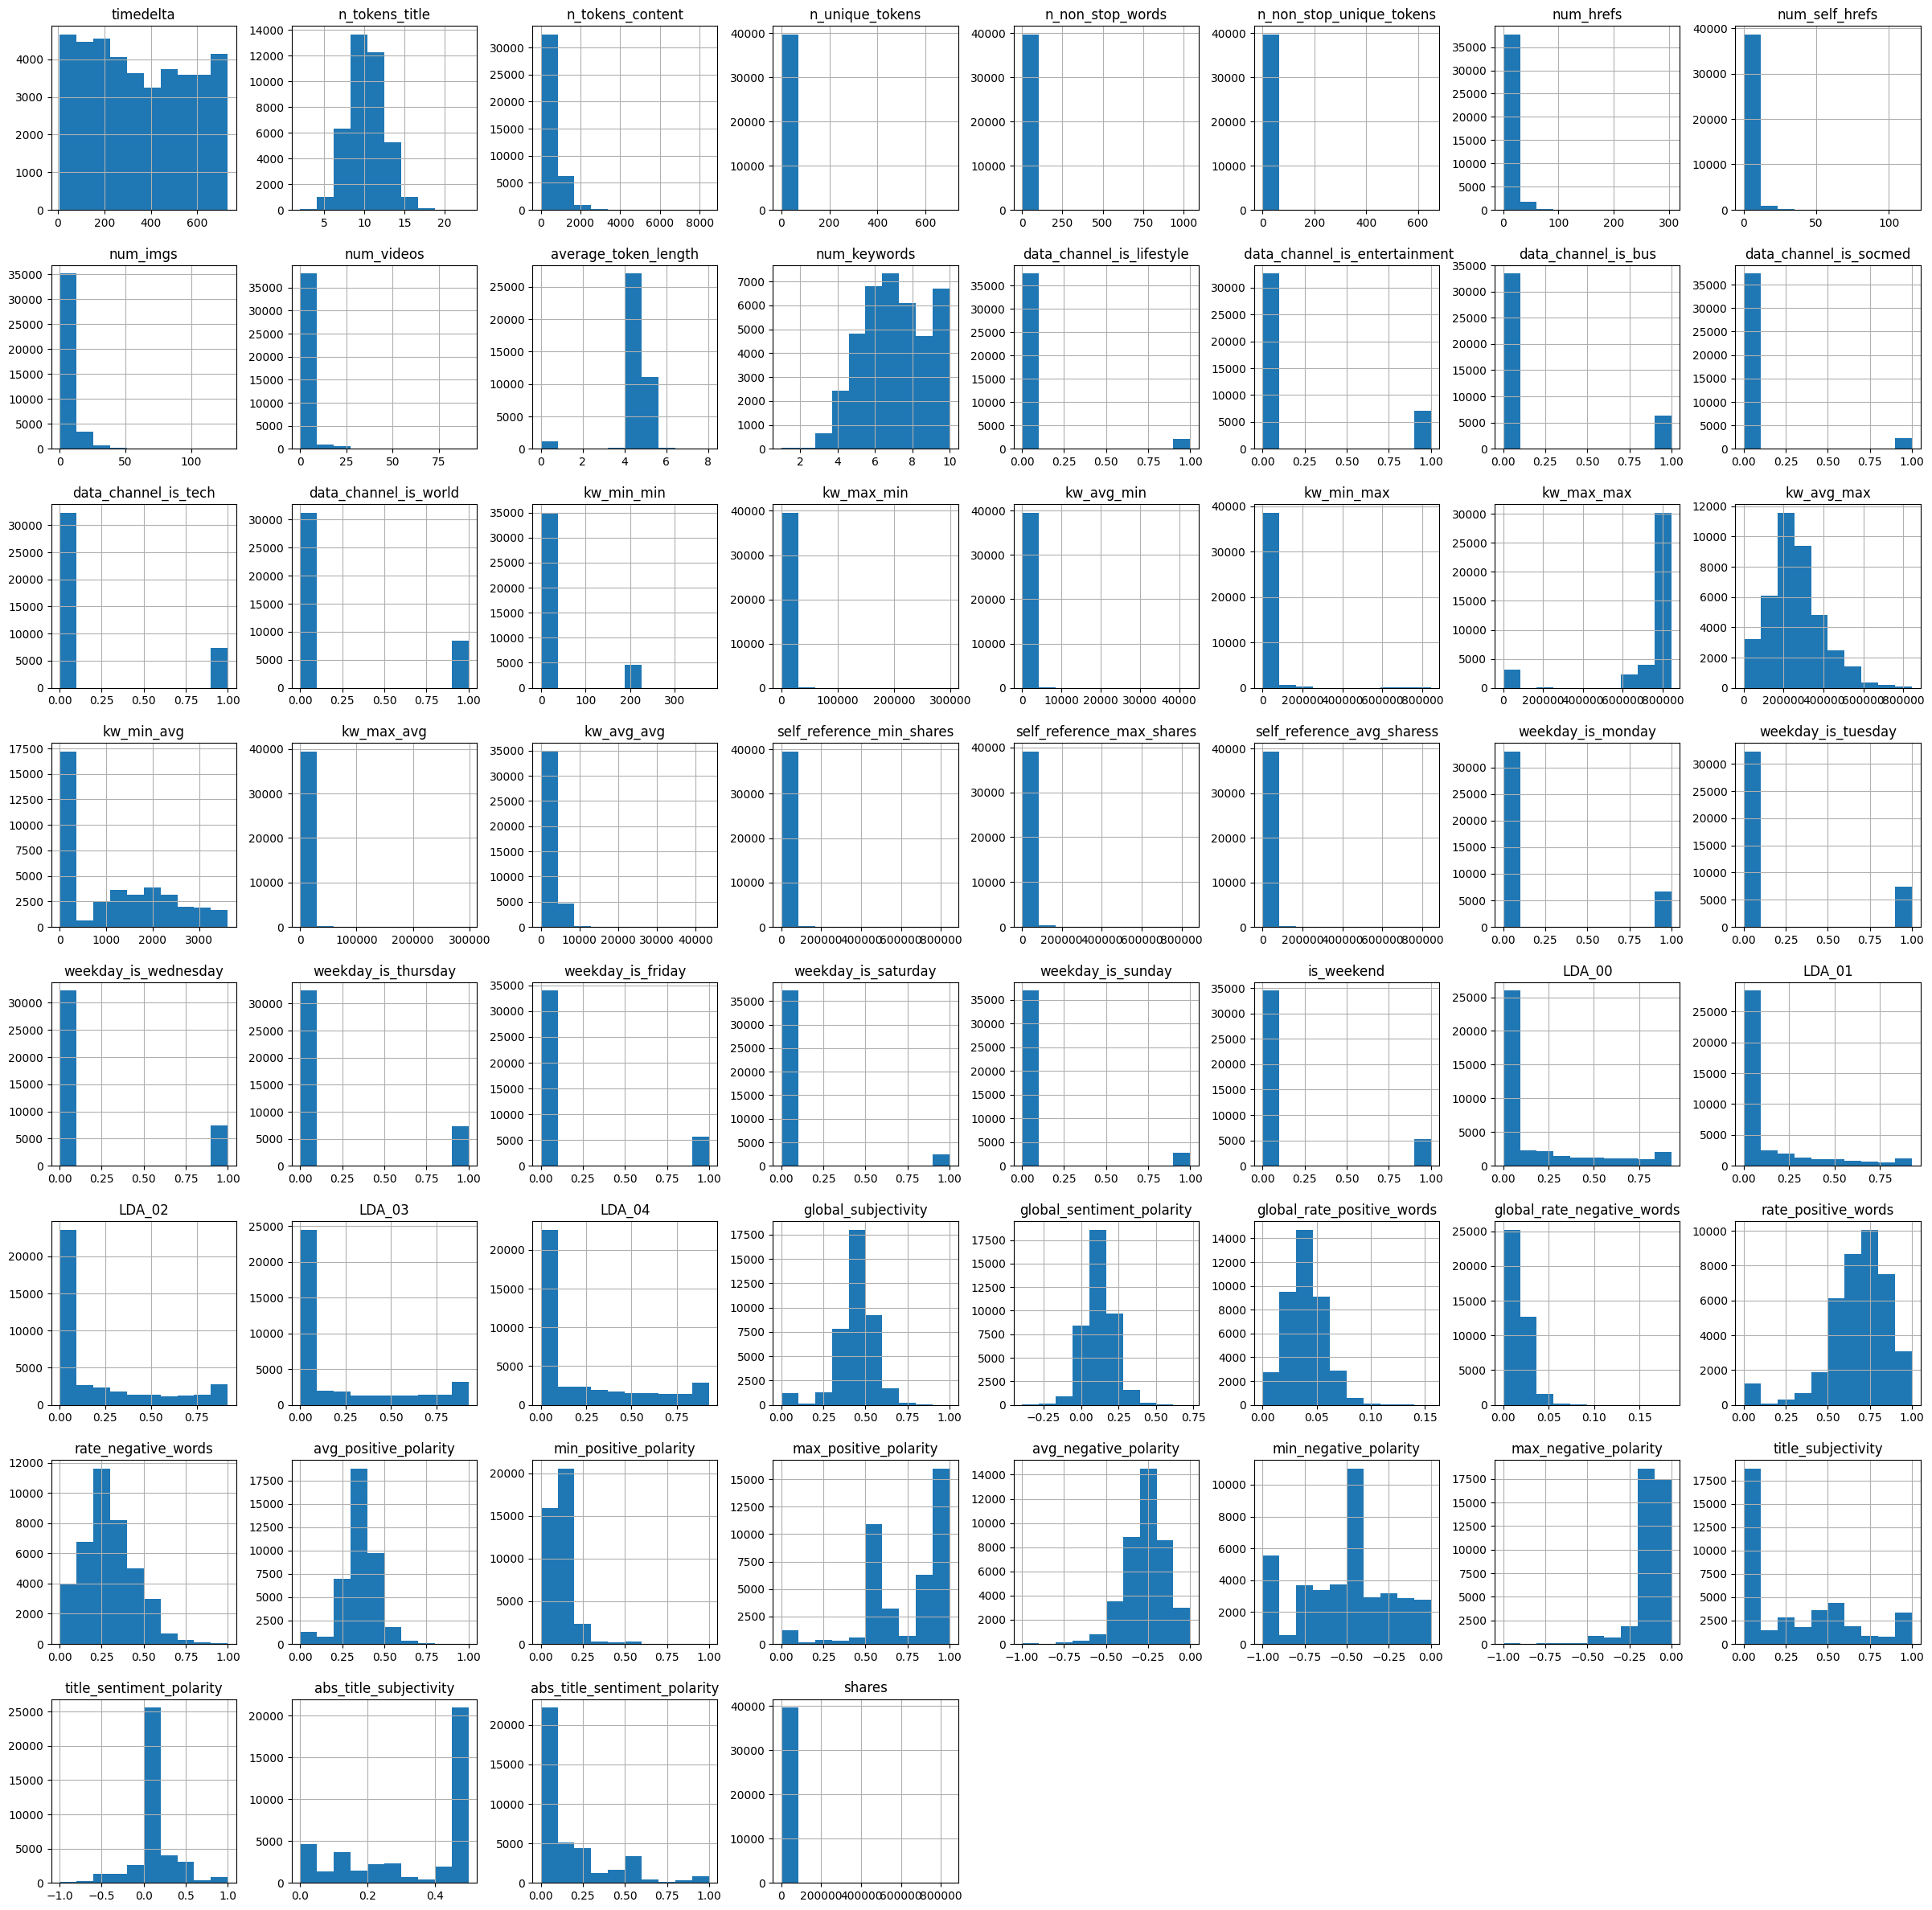

In [49]:
df_news.hist(figsize=(30, 30))
plt.show()

In [52]:
(df_news.corr()*100).style.background_gradient('coolwarm')

,timedelta,n_tokens_title,n_tokens_content,n_unique_tokens,n_non_stop_words,n_non_stop_unique_tokens,num_hrefs,num_self_hrefs,num_imgs,num_videos,average_token_length,num_keywords,data_channel_is_lifestyle,data_channel_is_entertainment,data_channel_is_bus,data_channel_is_socmed,data_channel_is_tech,data_channel_is_world,kw_min_min,kw_max_min,kw_avg_min,kw_min_max,kw_max_max,kw_avg_max,kw_min_avg,kw_max_avg,kw_avg_avg,self_reference_min_shares,self_reference_max_shares,self_reference_avg_sharess,weekday_is_monday,weekday_is_tuesday,weekday_is_wednesday,weekday_is_thursday,weekday_is_friday,weekday_is_saturday,weekday_is_sunday,is_weekend,LDA_00,LDA_01,LDA_02,LDA_03,LDA_04,global_subjectivity,global_sentiment_polarity,global_rate_positive_words,global_rate_negative_words,rate_positive_words,rate_negative_words,avg_positive_polarity,min_positive_polarity,max_positive_polarity,avg_negative_polarity,min_negative_polarity,max_negative_polarity,title_subjectivity,title_sentiment_polarity,abs_title_subjectivity,abs_title_sentiment_polarity,shares
timedelta,100.000000,-24.031967,-6.286684,0.286616,0.008933,0.380488,-0.083207,6.453045,-2.763590,0.093572,13.046489,4.688355,5.449176,-4.910912,5.578823,7.628681,8.327651,-17.024962,59.119881,2.950293,13.322478,-7.659032,-63.782391,-49.309336,-15.720355,-5.182048,-16.316365,-1.143775,-1.450145,-1.565512,-0.612895,-0.578067,0.996127,0.404172,-0.285291,-0.406701,0.422640,0.027162,8.089384,0.442312,-14.171287,-3.083824,9.290633,13.383700,15.864631,20.760396,1.026551,19.865449,-7.196827,12.634392,5.477195,9.828799,-0.050652,6.217513,-6.323874,-1.591863,3.871060,1.155066,-0.274519,0.866229
n_tokens_title,-24.031967,100.000000,1.815965,-0.531822,-0.475391,-0.541976,-5.349625,-1.485618,-0.885831,5.146019,-7.140254,-0.607696,-7.081530,13.279060,-2.390210,-9.039394,-4.671632,4.922291,-11.067233,-0.588974,-3.140012,1.292565,12.084075,11.574584,-0.237048,0.691759,0.429622,-0.456332,0.012807,0.066053,0.427433,0.932188,0.893503,-1.547206,-0.201538,-1.501259,0.628908,-0.599620,-7.003786,6.356824,3.836482,4.220760,-6.506345,-5.680430,-7.222570,-6.495086,1.552959,-6.658909,3.418564,-4.961912,-2.506854,-2.166171,-1.709590,-2.914564,1.142457,7.724480,0.023960,-14.695406,4.054968,0.878312
n_tokens_content,-6.286684,1.815965,100.000000,-0.473669,1.751175,0.037325,42.306509,30.468215,34.260040,10.369857,16.778918,7.284478,3.754829,6.019978,-0.610533,3.342370,2.540846,5.598925,-5.434541,0.006632,-0.354510,-2.278608,5.885964,-9.646035,-2.228585,-3.049644,-7.962356,-3.068576,2.565743,-1.380924,-0.248362,-0.402707,-1.689060,-0.739524,-1.594941,3.453849,3.639379,5.202358,2.621827,-0.972361,8.726643,-14.014086,4.126544,12.787940,2.193651,13.397920,12.501327,9.895952,10.105251,13.512254,-26.149271,41.570553,-13.037481,-45.060252,22.587040,0.448381,2.335772,0.713597,1.343932,0.245898
n_unique_tokens,0.286616,-0.531822,-0.473669,100.000000,99.957174,99.985152,-0.435165,0.662033,1.880174,-0.059750,2.640692,-0.367945,-0.165287,1.101618,-0.026402,-0.094467,-0.232770,-0.553506,0.160127,-0.055193,-0.082565,0.057720,-0.162426,0.080492,0.456292,-0.211978,-0.208278,0.103598,-0.022238,0.199194,-0.214166,1.053788,-0.222370,-0.224846,-0.139793,-0.256286,-0.180310,-0.318580,-0.221311,-0.082709,-0.685520,-0.368890,-0.425954,-0.017993,0.052311,0.001410,-0.087717,-0.066701,-0.165719,-0.048733,0.919344,-0.905421,0.145309,0.990235,-0.731497,-0.467778,-0.233344,-0.924245,-0.421656,0.080635
n_non_stop_words,0.008933,-0.475391,1.751175,99.957174,100.000000,99.953233,0.552103,1.359763,2.848624,-0.089919,3.155354,-0.143886,-0.031412,1.090300,-0.001191,-0.007794,0.006133,-0.270185,-0.035227,-0.059495,-0.089171,-0.055343,0.039402,-0.293892,0.328406,-0.340803,-0.541525,0.033894,0.016996,0.161413,-0.214705,1.050106,-0.251685,-0.235962,-0.196329,-0.150780,-0.133776,-0.208245,-0.103068,-0.286883,-0.328563,-0.976081,-0.107225,0.256514,0.083094,0.153483,0.103572,0.242110,0.124478,0.228483,0.090351,0.206168,-0.137169,-0.121381,-0.076092,-0.538925,-0.1

In [15]:
df_social['shares']
# or
share = df_social[df_social.keys()[-1]] 
share.describe()

count     39644.000000
mean       3395.380184
std       11626.950749
min           1.000000
25%         946.000000
50%        1400.000000
75%        2800.000000
max      843300.000000
Name: shares, dtype: float64

In [16]:
lab_enco = preprocessing.LabelEncoder()
pd.Series(lab_enco.fit_transform(share >= 1400))

0        0
1        0
2        1
3        0
4        0
        ..
39639    1
39640    1
39641    1
39642    0
39643    0
Length: 39644, dtype: int64

In [33]:
df_copy = df_social.copy()
df_copy.head(5)

,url,timedelta,n_tokens_title,n_tokens_content,n_unique_tokens,n_non_stop_words,n_non_stop_unique_tokens,num_hrefs,num_self_hrefs,num_imgs,...,min_positive_polarity,max_positive_polarity,avg_negative_polarity,min_negative_polarity,max_negative_polarity,title_subjectivity,title_sentiment_polarity,abs_title_subjectivity,abs_title_sentiment_polarity,shares
0,http://mashable.com/2013/01/07/amazon-instant-...,731.0,12.0,219.0,0.663594,1.0,0.815385,4.0,2.0,1.0,...,0.100000,0.7,-0.350000,-0.600,-0.200000,0.500000,-0.187500,0.000000,0.187500,593
1,http://mashable.com/2013/01/07/ap-samsung-spon...,731.0,9.0,255.0,0.604743,1.0,0.791946,3.0,1.0,1.0,...,0.033333,0.7,-0.118750,-0.125,-0.100000,0.000000,0.000000,0.500000,0.000000,711
2,http://mashable.com/2013/01/07/apple-40-billio...,731.0,9.0,211.0,0.575130,1.0,0.663866,3.0,1.0,1.0,...,0.100000,1.0,-0.466667,-0.800,-0.133333,0.000000,0.000000,0.500000,0.000000,1500
3,http://mashable.com/2013/01/07/astronaut-notre...,731.0,9.0,531.0,0.503788,1.0,0.665635,9.0,0.0,1.0,...,0.136364,0.8,-0.369697,-0.600,-0.166667,0.000000,0.000000,0.500000,0.000000,1200
4,http://mashable.com/2013/01/07/att-u-verse-apps/,731.0,13.0,1072.0,0.415646,1.0,0.540890,19.0,19.0,20.0,...,0.033333,1.0,-0.220192,-0.500,-0.050000,0.454545,0.136364,0.045455,0.136364,505


In [35]:
#normalizing the numerical features
std_scaler = preprocessing.StandardScaler()
df_copy[df_social.keys()[2:]] = std_scaler.fit_transform(df_social[df_social.keys()[2:]])

,url,timedelta,n_tokens_title,n_tokens_content,n_unique_tokens,n_non_stop_words,n_non_stop_unique_tokens,num_hrefs,num_self_hrefs,num_imgs,...,min_positive_polarity,max_positive_polarity,avg_negative_polarity,min_negative_polarity,max_negative_polarity,title_subjectivity,title_sentiment_polarity,abs_title_subjectivity,abs_title_sentiment_polarity,shares
0,http://mashable.com/2013/01/07/amazon-instant-...,731.0,0.757447,-0.695210,0.032772,0.000675,0.038658,-0.607463,-0.335566,-0.426526,...,0.063865,-0.228941,-0.708369,-0.268895,-0.969886,0.671245,-0.975432,-1.810719,0.138920,-0.241028
1,http://mashable.com/2013/01/07/ap-samsung-spon...,731.0,-0.661657,-0.618794,0.016056,0.000675,0.031479,-0.695709,-0.594963,-0.426526,...,-0.870968,-0.228941,1.102174,1.367424,0.078642,-0.870807,-0.269076,0.837749,-0.689658,-0.230879
2,http://mashable.com/2013/01/07/apple-40-billio...,731.0,-0.661657,-0.712192,0.007645,0.000675,-0.007752,-0.695709,-0.594963,-0.426526,...,0.063865,0.981798,-1.621797,-0.957871,-0.270867,-0.870807,-0.269076,0.837749,-0.689658,-0.163018
3,http://mashable.com/2013/01/07/astronaut-notre...,731.0,-0.661657,-0.032933,-0.012619,0.000675,-0.007211,-0.166229,-0.854360,-0.426526,...,0.573773,0.174639,-0.862584,-0.268895,-0.620377,-0.870807,-0.269076,0.837749,-0.689658,-0.188821
4,http://mashable.com/2013/01/07/att-u-verse-apps/,731.0,1.230482,1.115439,-0.037655,0.000675,-0.045420,0.716237,4.074185,1.860061,...,-0.870968,0.981798,0.307944,0.075594,0.602906,0.531059,0.244637,-1.569949,-0.087056,-0.248596


In [36]:
df_copy

,url,timedelta,n_tokens_title,n_tokens_content,n_unique_tokens,n_non_stop_words,n_non_stop_unique_tokens,num_hrefs,num_self_hrefs,num_imgs,...,min_positive_polarity,max_positive_polarity,avg_negative_polarity,min_negative_polarity,max_negative_polarity,title_subjectivity,title_sentiment_polarity,abs_title_subjectivity,abs_title_sentiment_polarity,shares
0,http://mashable.com/2013/01/07/amazon-instant-...,731.0,0.757447,-0.695210,0.032772,0.000675,0.038658,-0.607463,-0.335566,-0.426526,...,0.063865,-0.228941,-0.708369,-0.268895,-0.969886,0.671245,-0.975432,-1.810719,0.138920,-0.241028
1,http://mashable.com/2013/01/07/ap-samsung-spon...,731.0,-0.661657,-0.618794,0.016056,0.000675,0.031479,-0.695709,-0.594963,-0.426526,...,-0.870968,-0.228941,1.102174,1.367424,0.078642,-0.870807,-0.269076,0.837749,-0.689658,-0.230879
2,http://mashable.com/2013/01/07/apple-40-billio...,731.0,-0.661657,-0.712192,0.007645,0.000675,-0.007752,-0.695709,-0.594963,-0.426526,...,0.063865,0.981798,-1.621797,-0.957871,-0.270867,-0.870807,-0.269076,0.837749,-0.689658,-0.163018
3,http://mashable.com/2013/01/07/astronaut-notre...,731.0,-0.661657,-0.032933,-0.012619,0.000675,-0.007211,-0.166229,-0.854360,-0.426526,...,0.573773,0.174639,-0.862584,-0.268895,-0.620377,-0.870807,-0.269076,0.837749,-0.689658,-0.188821
4,http://mashable.com/2013/01/07/att-u-verse-apps/,731.0,1.230482,1.115439,-0.037655,0.000675,-0.045420,0.716237,4.074185,1.860061,...,-0.870968,0.981798,0.307944,0.075594,0.602906,0.531059,0.244637,-1.569949,-0.087056,-0.248596
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
39639,http://mashable.com/2014/12/27/samsung-app-aut...,8.0,0.284413,-0.425630,-0.005443,0.000675,-0.001346,-0.166229,0.961420,-0.426526,...,0.063865,-0.027151,-0.003726,0.075594,-0.183490,-0.562396,-0.269076,0.308055,-0.689658,-0.137216
39640,http://mashable.com/2014/12/27/seth-rogen-jame...,8.0,0.757447,-0.463838,0.042060,0.000675,0.059999,-0.166229,0.961420,-0.185832,...,0.573773,-0.228941,0.379044,0.420082,0.078642,0.054425,3.498156,-0.751332,3.729424,-0.128615
39641,http://mashable.com/2014/12/27/son-pays-off-mo...,8.0,-0.188622,-0.221852,-0.009050,0.000675,-0.013798,1.157470,-0.594963,0.897288,...,0.573773,-1.036100,-0.758786,-0.957871,-0.620377,0.531059,0.244637,-1.569949,-0.087056,-0.128615
39642,http://mashable.com/2014/12/27/ukraine-blasts/,8.0,-2.080761,0.287592,-0.002477,0.000675,0.001068,-0.077983,-0.594963,-0.426526,...,-0.461978,-1.036100,0.424968,0.075594,0.996104,-0.870807,-0.269076,0.837749,-0.689658,-0.197421
